In [103]:
from sklearn.covariance import EllipticEnvelope
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io 
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Description: X = Multi-dimensional point data, y = labels (1 = outliers, 0 = inliers)**

In [67]:
mat = scipy.io.loadmat(os.path.join('wine','cover.mat'))
x_train = mat['X']
y_train = mat['y']
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.15, random_state=1)

In [68]:
outmodel = EllipticEnvelope(random_state=1245).fit(X_train)

In [69]:
y_pred = outmodel.predict(X_test)

In [70]:
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

Classification Report:
              precision    recall  f1-score   support

           0     0.9906    0.9036    0.9451     42483
           1     0.0142    0.1388    0.0258       425

    accuracy                         0.8960     42908
   macro avg     0.5024    0.5212    0.4854     42908
weighted avg     0.9809    0.8960    0.9360     42908



Text(33.0, 0.5, 'True Labels')

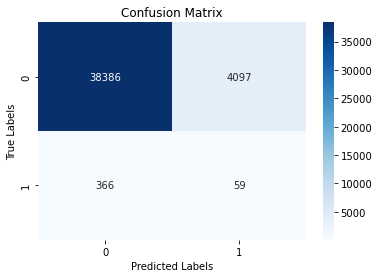

In [71]:
print('Classification Report:')

print(classification_report(y_test, y_pred, digits=4))       
cm_det = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm_det, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')



The sample is umbalanced, let's performe the downsample technique

In [81]:
f= pd.DataFrame(mat['X'])
f['y'] = mat['y']

In [88]:
norm = f[f['y']==0]
ano = f[f['y']==1]

In [93]:
from sklearn.utils import resample
norm_down = resample(norm,
             replace=True,
             n_samples=len(ano),
             random_state=42)

In [94]:
norm_down

,0,1,2,3,4,5,6,7,8,9,y
124118,3213,182,9,511,93,6016,223,246,156,3181,0
149027,2625,16,23,153,57,1052,193,185,120,949,0
134092,2907,90,29,190,-32,513,249,181,41,1940,0
261925,3204,7,18,150,37,1860,195,202,141,2093,0
122039,3144,35,11,450,75,4301,219,215,130,2056,0
...,...,...,...,...,...,...,...,...,...,...,...
78181,2973,349,10,577,241,3313,202,224,160,1374,0
161587,2758,277,23,180,85,2055,152,237,221,216,0
46949,2513,295,4,60,3,360,209,238,169,379,0
28246,2886,88,18,67,0,6079,244,208,88,4517,0


In [95]:
data_downsampled = pd.concat([norm_down, ano])

In [99]:
y= data_downsampled['y']
x=data_downsampled.drop(columns=['y'])

In [119]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)
X_train = np.array(X_train)
X_tes = np.array(X_test)
y_train = np.array(y_train)
y_tes = np.array(y_test)


In [122]:
outmodel1 = EllipticEnvelope(random_state=1245).fit(X_train)

Classification Report:
              precision    recall  f1-score   support

           0     0.4940    0.9027    0.6386       411
           1     0.4595    0.0821    0.1393       414

    accuracy                         0.4909       825
   macro avg     0.4767    0.4924    0.3889       825
weighted avg     0.4767    0.4909    0.3880       825



Text(33.0, 0.5, 'True Labels')

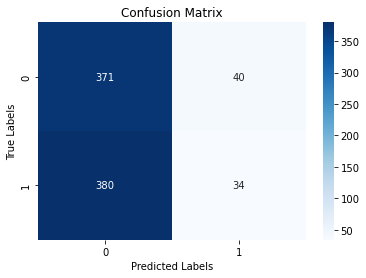

In [125]:
y_pre = outmodel1.predict(X_tes)

y_pre[y_pre==1]=0
y_pre[y_pre==-1]=1

print('Classification Report:')

print(classification_report(y_tes, y_pre, digits=4))       
cm_det = confusion_matrix(y_tes, y_pre)

ax= plt.subplot()
sns.heatmap(cm_det, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')



In [130]:
sum(y_pred1==1)

74

In [118]:
len(y_tes)

4669